In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os.path
import librosa
import librosa.display
import IPython.display as ipd
from shutil import copyfile
import glob

## Organizing audio data into folders according to class

In [3]:
from kaymo import ROOTDIR
# pathData = f'{ROOTDIR}datasets/kaymodb/'
pathAudio = f'{ROOTDIR}/datasets/kaymodb/'
pathImage = f'{ROOTDIR}/datasets/kaymodb_images/'

In [4]:
df = pd.read_csv('kaymodb.csv')

In [5]:
df.head()

,dataset,filename,emotion,length,path,features_0,features_1,features_2,features_3,features_4,...,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25
0,ravdees,01-2-speech_ravdees_sad_74.wav,sad,3.570250,/Users/amrmkayid/Desktop/KayMo/datasets/kaymod...,0.545414,0.002501,1973.948200,1778.754891,3763.950893,...,-6.857643,-0.478890,-5.301823,-1.384772,-3.173270,-1.795927,-3.512450,-4.508770,-3.834567,-3.792917
1,ravdees,01-2-speech_ravdees_disgust_113.wav,disgust,4.070750,/Users/amrmkayid/Desktop/KayMo/datasets/kaymod...,0.491052,0.007874,2326.159623,1850.600792,4402.160645,...,-6.862782,-1.173606,-5.694985,-1.598615,-4.986942,-3.136842,-4.265388,-3.235634,-5.290634,-2.422716
2,savee,02_savee_fearful_52.wav,fearful,5.136312,/Users/amrmkayid/Desktop/KayMo/datasets/kaymod...,0.373958,0.181451,833.398224,1079.256098,1603.794643,...,-5.849105,-5.348601,1.098963,8.538878,-11.251228,5.618439,2.839035,-4.235811,0.742446,-3.305650
3,ravdees,01-2-speech_ravdees_angry_176.wav,angry,4.437812,/Users/amrmkayid/Desktop/KayMo/datasets/kaymod...,0.387588,0.057560,2469.223346,1787.909878,4542.378597,...,-3.607071,4.255699,5.790010,12.351086,4.807927,2.789146,-3.765814,-3.955039,-0.841201,4.820526
4,ravdees,01-1-songs_ravdees_calm_97.wav,calm,4.504500,/Users/amrmkayid/Desktop/KayMo/datasets/kaymod...,0.382158,0.005805,1618.335674,1751.343404,3487.311613,...,-0.362956,-1.931938,-1.533616,5.288650,-5.727822,0.332127,-0.991812,-0.557345,-6.442074,-0.363849


In [6]:
emotions = set(df['emotion'])
emotions

{'angry',
 'bored',
 'calm',
 'disgust',
 'fearful',
 'happy',
 'neutral',
 'sad',
 'surprised'}

In [8]:
for emotion in emotions:
    folder = f'datasets/kaymodb_images/{emotion}'
    ! mkdir {folder}

## Converting audio files into images based on spectrogram

In [9]:
def save_spectrogram(audio_fname, image_fname):
    y, sr = librosa.load(audio_fname, mono=True, sr=16000)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    fig1 = plt.gcf()
#     plt.axis('off')
#     plt.show()
#     plt.draw()
    fig1.savefig(image_fname, dpi=100)

def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

def get_filename(path):
    absolute_fname = path.as_posix()
    absolute_fname_parts = absolute_fname.split('/')
    fname = absolute_fname_parts[len(absolute_fname_parts) - 1]
    return fname

def audio_to_spectrogram(audio_dir_path, image_dir_path=None):
    for paths in batch(audio_dir_path.ls(), 100):
        for audio_path in paths:
            audio_filename = get_filename(audio_path)
            image_fname = audio_filename.split('.')[0] + '.png'
            if image_dir_path:
                image_fname = image_dir_path.as_posix() + '/' + image_fname
            if Path(image_fname).exists(): continue
            print(image_fname)
            #plot_spectrogram(image_fname)
            try:
                save_spectrogram(audio_path.as_posix(), image_fname)
            except ValueError as verr:
                print('Failed to process %s %s' % (image_fname, verr))
        # wait between every batch for xyz seconds

In [ ]:
for emotion in emotions:
    print('Emotion: ' + emotion)
    pathAudioEmotion = Path(pathAudio+emotion)
    pathImageEmotion = Path(pathImage+emotion)
    print(pathAudioEmotion)
    print(pathImageEmotion)
    audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

Emotion: disgust
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb/disgust
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_24.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_30.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_18.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_7.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/0_emodb_disgust_13.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_8.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/0_emodb_disgust_7.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_67.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_73.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_image

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_150.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_151.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_145.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_179.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_192.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_186.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_88.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/0_emodb_disgust_3.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_77.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_63.png
/Users/amrmkayid/Desktop/Ka

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_58.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_48.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_60.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/0_emodb_disgust_43.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_37.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_23.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_139.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_111.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_105.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_104.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgus

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_167.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_173.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_82.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_96.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_69.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_41.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/0_emodb_disgust_9.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/01-2-speech_ravdees_disgust_55.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/0_emodb_disgust_21.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/disgust/02_savee_disgust_6.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_130.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_124.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_108.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_120.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_134.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_35.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_21.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_69.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_55.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_41.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/f

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_31.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_25.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_81.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_51.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_45.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_79.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_92.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_86.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_178.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_144.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymo

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_191.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_43.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_57.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_9.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_80.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_94.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_156.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_142.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_181.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_183.png
/Users/amrmkayid/Desktop/KayMo/d

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_159.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_165.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_171.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_167.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_173.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_99.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_4.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_72.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_66.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_12.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymo

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_66.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_158.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_170.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_164.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_15.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_29.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_99.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_49.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_75.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_61.png
/Users/amrmkayid/Desktop/KayMo/datasets/kay

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_128.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_116.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_102.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_17.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/0_emodb_fearful_63.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_106.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_38.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-2-speech_ravdees_fearful_112.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/01-1-songs_ravdees_fearful_10.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/fearful/02_savee_fearful_40.png
/Users/amrmkayid/Desktop/KayMo/datasets/kay

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_162.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_27.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_33.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_60.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_14.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_48.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_28.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_16.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_19.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_25.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_1.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_5.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_68.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_40.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_182.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_54.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_169.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_138.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_155.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_110.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_141.png
/Users/amrmkay

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_84.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_60.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_28.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_48.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_25.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_45.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_51.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_31.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_19.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_79.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_89.png
/Users/amrmk

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_59.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_71.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_65.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_8.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_9.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_64.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_70.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_58.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_1.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_171.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_134.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_rav

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/02_savee_happy_45.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_25.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_19.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_16.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_147.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_102.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_153.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-1-songs_ravdees_happy_116.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/0_emodb_happy_17.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_happy_184.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/happy/01-2-speech_ravdees_

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_27.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_33.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_19.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_25.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_31.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/02_savee_surprised_41.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/02_savee_surprised_55.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_105.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_111.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_139.png

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_53.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_47.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_90.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_84.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_80.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_94.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_43.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_57.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/02_savee_surprised_27.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/02_savee_surprised_33.png
/U

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/02_savee_surprised_12.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_142.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_156.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_181.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_180.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_157.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_143.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/02_savee_surprised_13.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_77.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/surprised/01-2-speech_ravdees_surprised_63.

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-1-songs_ravdees_neutral_28.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-1-songs_ravdees_neutral_14.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_73.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_67.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_13.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_3.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_2.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_12.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_66.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_72.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-1-songs_ravdees_neutral_15.png

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/02_savee_neutral_97.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/02_savee_neutral_68.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/02_savee_neutral_40.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/02_savee_neutral_54.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/02_savee_neutral_33.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/02_savee_neutral_27.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-1-songs_ravdees_neutral_77.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-1-songs_ravdees_neutral_63.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-1-songs_ravdees_neutral_88.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_38.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_10.png
/Users/amrmkayi

/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_45.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_79.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_92.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_86.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_87.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_93.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_78.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_44.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/01-2-speech_ravdees_neutral_50.png
/Users/amrmkayid/Desktop/KayMo/datasets/kaymodb_images/neutral/0_emodb_neutral_24.png
/Users/amrmkayid/Desktop/KayMo/d

## Training ResNet model using transfer learning

In [9]:
np.random.seed(42)
data = ImageDataBunch.from_folder(pathImage, train='.', valid_pct=0.2,
        ds_tfms=None, size=[400,600], num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['angry',
 'bored',
 'calm',
 'disgust',
 'fearful',
 'happy',
 'neutral',
 'sad',
 'surprised']

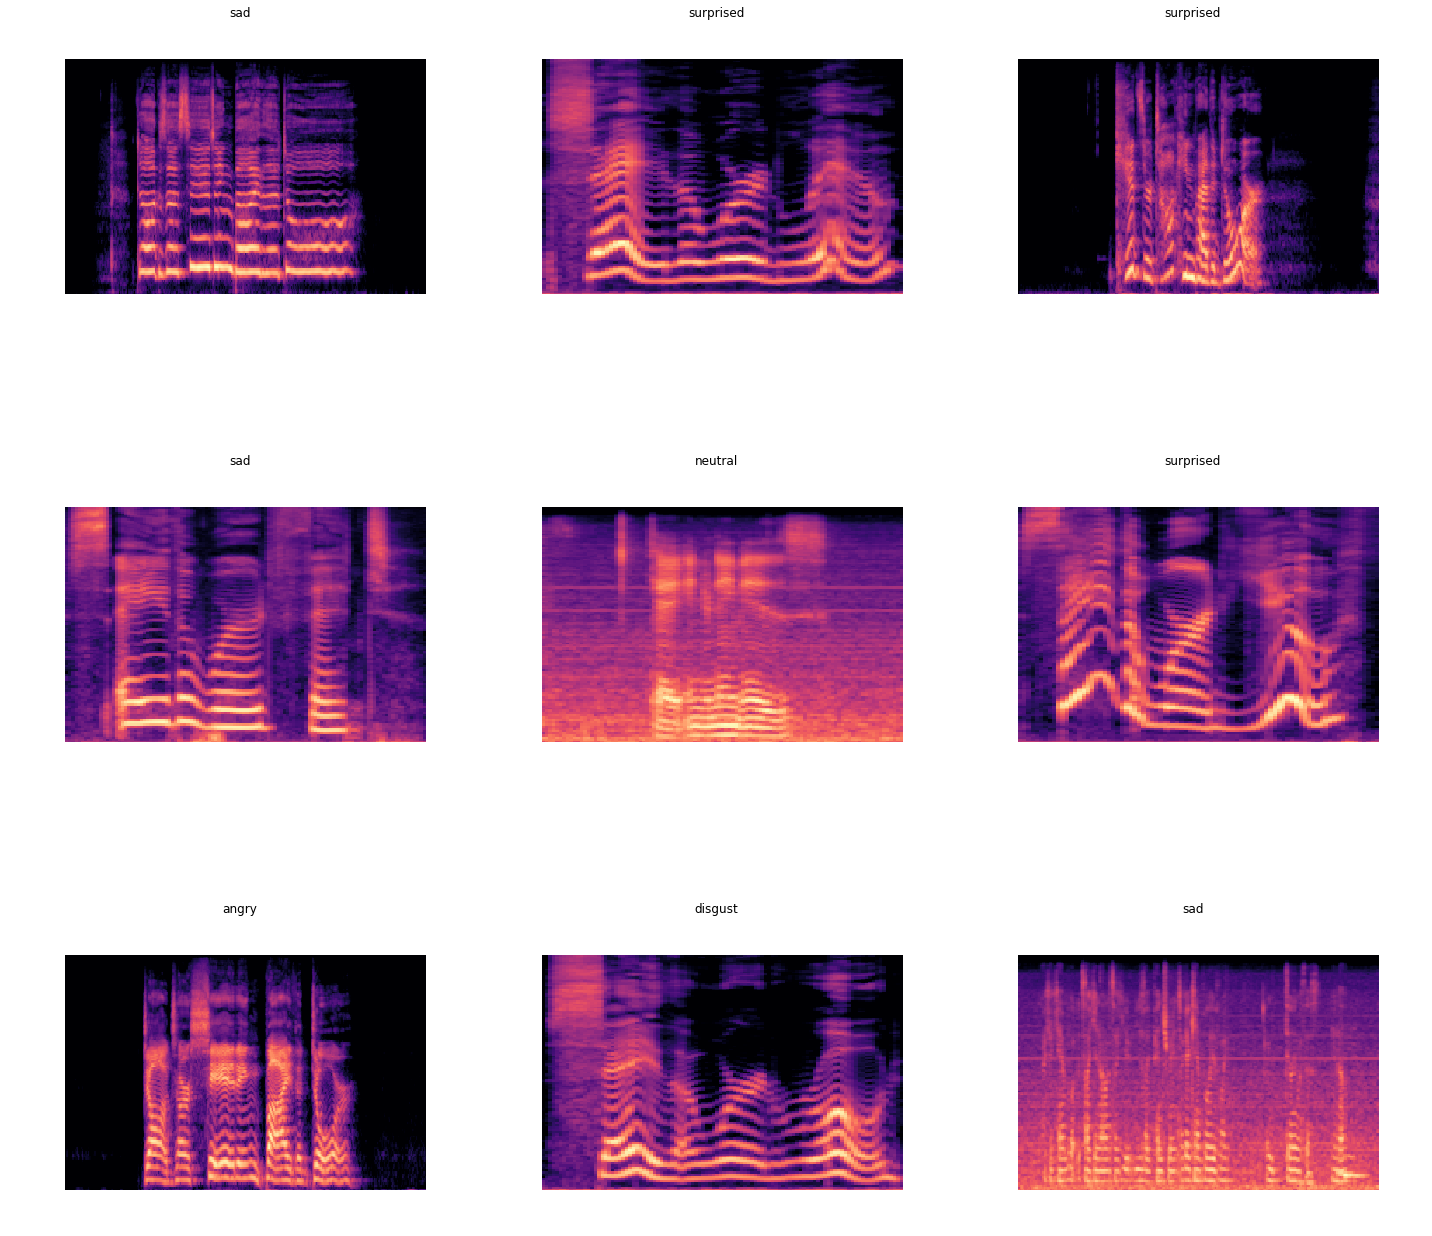

In [11]:
data.show_batch(rows=3,figsize=(20,20))

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [13]:
torch.cuda.empty_cache()

In [14]:
learn.lr_find()
learn.recorder.plot()

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 3.95 GiB total capacity; 3.01 GiB already allocated; 12.19 MiB free; 103.74 MiB cached)

In [15]:
torch.cuda.empty_cache()

In [16]:
lr = 1e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.356367,1.021104,0.590928,00:45
1,1.168615,0.969892,0.599830,00:43
2,1.040392,0.888873,0.639678,00:44
3,0.946376,0.838627,0.658330,00:44
4,0.846138,0.823504,0.661297,00:44


In [17]:
learn.save('stage-1-alexnet')

In [18]:
learn.unfreeze()

In [20]:
torch.cuda.empty_cache()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


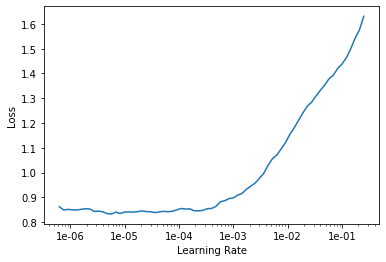

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
torch.cuda.empty_cache()

In [23]:
learn.fit_one_cycle(10, slice(5e-7, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.831647,0.812220,0.661297,01:09
1,0.805880,0.797623,0.672743,01:08
2,0.773526,0.788741,0.680373,01:07
3,0.722582,0.750822,0.696058,01:08
4,0.672340,0.759803,0.693938,01:08
5,0.597423,0.731348,0.696482,01:08
6,0.537209,0.739520,0.708775,01:08
7,0.494453,0.732893,0.708775,01:09
8,0.476291,0.726863,0.713014,01:09
9,0.452518,0.729132,0.709623,01:07


In [28]:
torch.cuda.empty_cache()

In [27]:
learn.save('stage-2-alexnet')

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

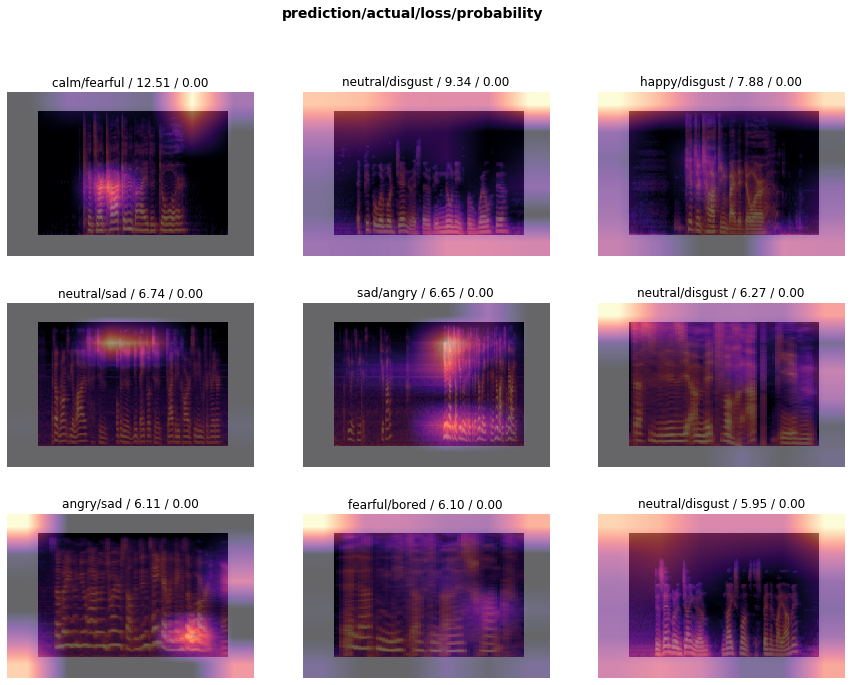

In [30]:
interp.plot_top_losses(9, figsize=(15,11))

In [31]:
interp.most_confused(min_val=2)

[('happy', 'neutral', 86),
 ('sad', 'neutral', 73),
 ('neutral', 'happy', 65),
 ('happy', 'angry', 61),
 ('angry', 'happy', 54),
 ('neutral', 'sad', 43),
 ('happy', 'sad', 41),
 ('angry', 'neutral', 35),
 ('sad', 'happy', 24),
 ('neutral', 'angry', 19),
 ('sad', 'calm', 14),
 ('calm', 'sad', 11),
 ('fearful', 'surprised', 10),
 ('angry', 'sad', 9),
 ('happy', 'fearful', 9),
 ('sad', 'fearful', 9),
 ('angry', 'disgust', 8),
 ('disgust', 'neutral', 8),
 ('surprised', 'happy', 7),
 ('disgust', 'angry', 6),
 ('fearful', 'sad', 6),
 ('neutral', 'calm', 6),
 ('sad', 'angry', 6),
 ('angry', 'fearful', 5),
 ('disgust', 'sad', 5),
 ('calm', 'neutral', 4),
 ('fearful', 'angry', 4),
 ('fearful', 'disgust', 4),
 ('neutral', 'bored', 4),
 ('sad', 'disgust', 4),
 ('bored', 'neutral', 3),
 ('disgust', 'happy', 3),
 ('disgust', 'surprised', 3),
 ('fearful', 'neutral', 3),
 ('happy', 'disgust', 3),
 ('happy', 'surprised', 3),
 ('surprised', 'disgust', 3),
 ('angry', 'surprised', 2),
 ('calm', 'fearful'

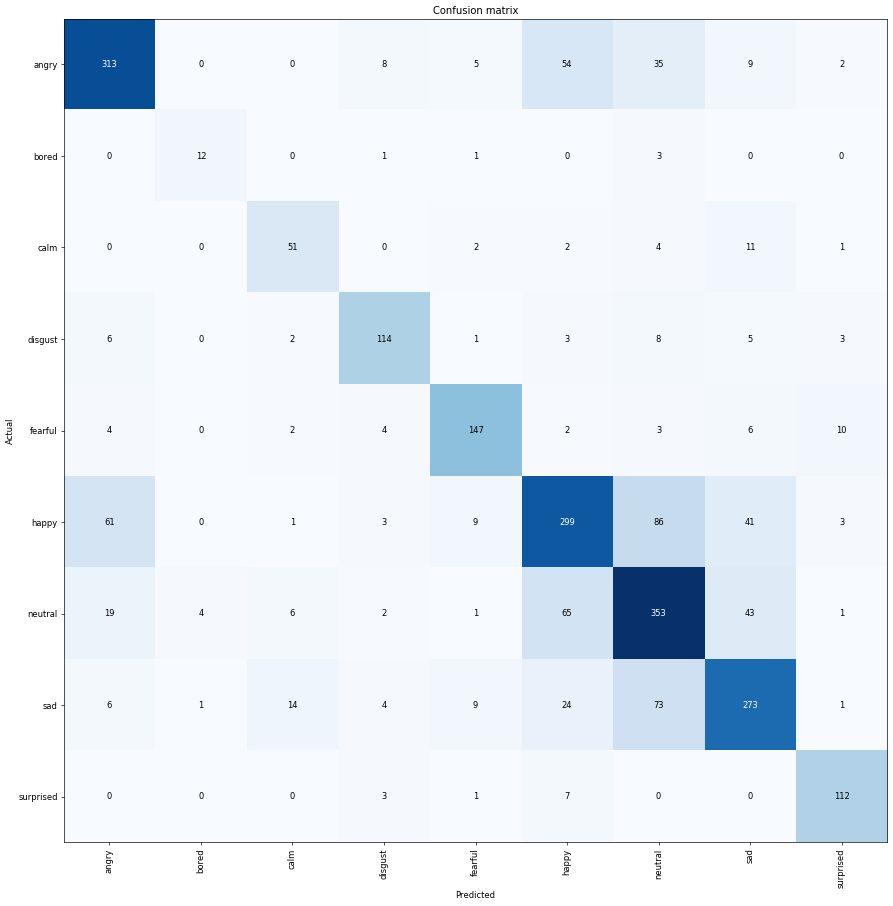

In [33]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

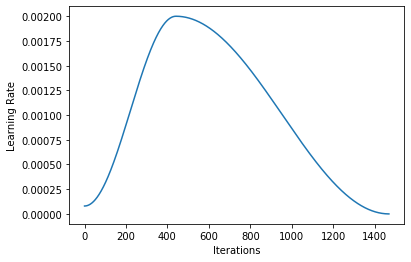

In [34]:
learn.recorder.plot_lr()

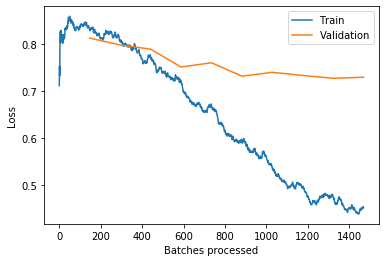

In [35]:
learn.recorder.plot_losses()